In [682]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
from datetime import datetime
plt.rcParams["figure.figsize"] = (20,5)

<h2>Data Cleansing
    <h4>In this section, we import the dataset and correct any problems that could interfere with our anaylisis. This includes: <br> 
        <ul>
<li>Removing unnecessary columns</li>
<li>Ensuring that missing values are filled and extreme outliers are recognized</li>
<li>Checking that data types fit our needs</li>
        </ul>

In [683]:
path="/Users/ben/Desktop/supermarket_sales - Sheet1.csv"
ds=pd.read_csv(path)
print(ds.head())
print(ds.dtypes)

    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:

In [684]:
ds.columns


Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

<h4>There is only 1 'Branch' for each 'City', so we will remove the 'Branch' column as it is redundant. <br> We will remove the 'gross margin percentage' column as well. It has the same value for every row so it does not provide actionable information. <br>The "Tax" column represents a predetermined and un-changeable percentage. So we don't need that column either.

In [685]:
#removes unwanted columns and checks for empty cells
def basic_data_cleansing (cols_to_drop):
    global clean_ds
    clean_ds=ds.drop(cols_to_drop, 1)
    check_na=clean_ds.isna().sum()
    print("New Column List and # of emtpy cells\n\n",check_na)
basic_data_cleansing(['Branch','gross margin percentage','Tax 5%'])


New Column List and # of emtpy cells

 Invoice ID       0
City             0
Customer type    0
Gender           0
Product line     0
Unit price       0
Quantity         0
Total            0
Date             0
Time             0
Payment          0
cogs             0
gross income     0
Rating           0
dtype: int64


In [686]:
#converts'Date' and 'Time' to pandas datetime dtype.
clean_ds['Date']=pd.to_datetime(clean_ds['Date'])
clean_ds['Time']=pd.to_datetime(clean_ds['Time'])
print(clean_ds.dtypes)
print(clean_ds.head())


Invoice ID               object
City                     object
Customer type            object
Gender                   object
Product line             object
Unit price              float64
Quantity                  int64
Total                   float64
Date             datetime64[ns]
Time             datetime64[ns]
Payment                  object
cogs                    float64
gross income            float64
Rating                  float64
dtype: object
    Invoice ID       City Customer type  Gender            Product line  \
0  750-67-8428     Yangon        Member  Female       Health and beauty   
1  226-31-3081  Naypyitaw        Normal  Female  Electronic accessories   
2  631-41-3108     Yangon        Normal    Male      Home and lifestyle   
3  123-19-1176     Yangon        Member    Male       Health and beauty   
4  373-73-7910     Yangon        Normal    Male       Sports and travel   

   Unit price  Quantity     Total       Date                Time      Payment  \
0     

<h1>Insights 
        

In [687]:
#Creates a function that will be used to explore correlations between sales (sum and average) and transaction variables.
def groupfunc (c1, c2, calc):
    return(pd.DataFrame(clean_ds.groupby([c1])[c2].agg(calc)))

In [688]:
cats_to_plot=['Gender','Payment','Customer type','City', 'Product line']
for col in cats_to_plot:
    print(groupfunc(col,'Total','sum'))
    

             Total
Gender            
Female  167882.925
Male    155083.824
                  Total
Payment                
Cash         112206.570
Credit card  100767.072
Ewallet      109993.107
                    Total
Customer type            
Member         164223.444
Normal         158743.305
                 Total
City                  
Mandalay   106197.6720
Naypyitaw  110568.7065
Yangon     106200.3705
                             Total
Product line                      
Electronic accessories  54337.5315
Fashion accessories     54305.8950
Food and beverages      56144.8440
Health and beauty       49193.7390
Home and lifestyle      53861.9130
Sports and travel       55122.8265


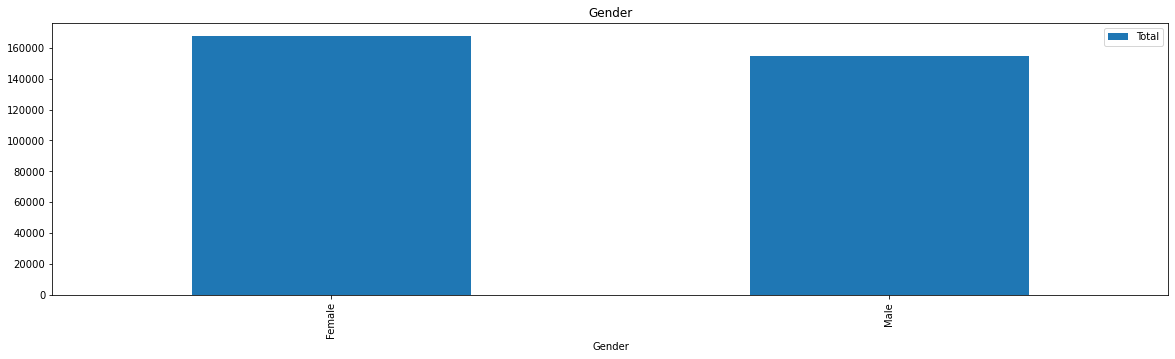

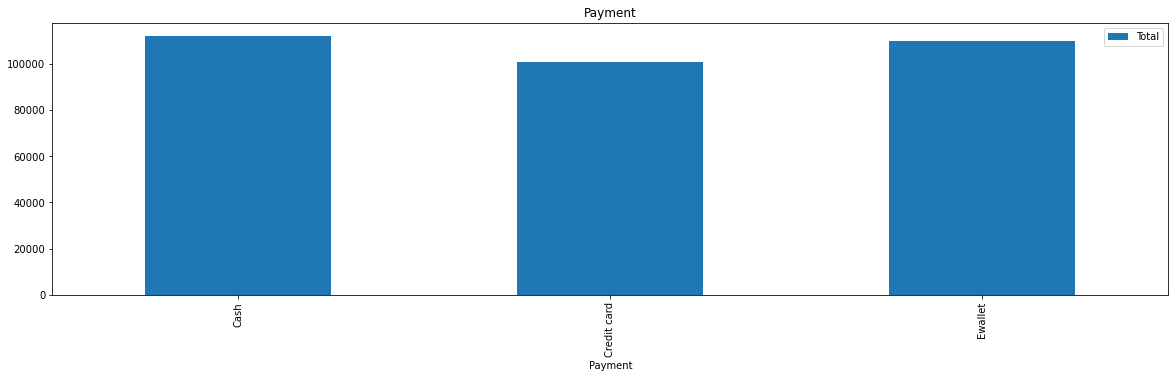

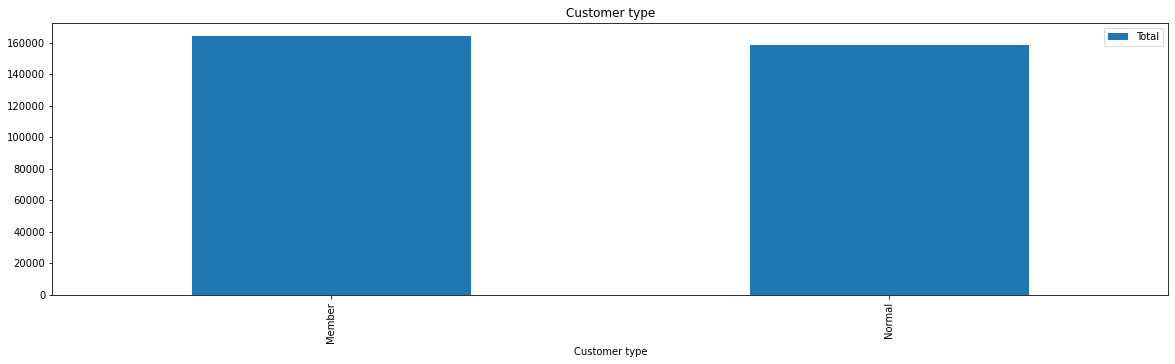

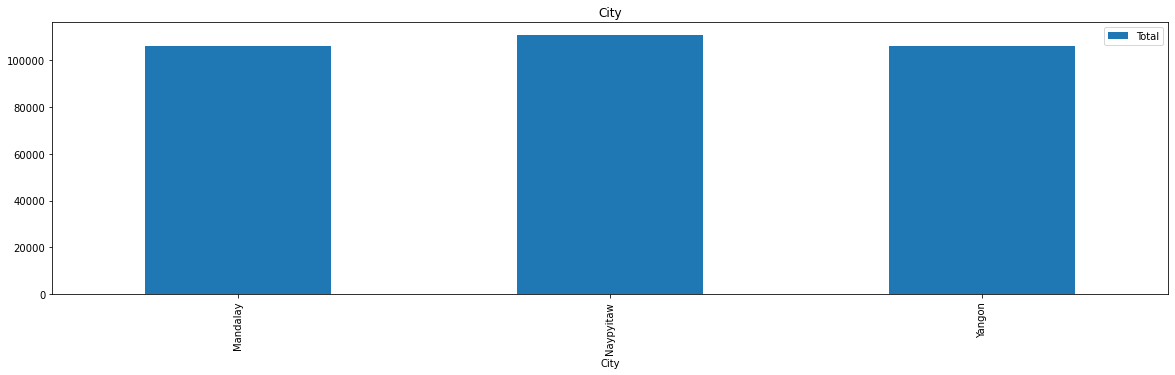

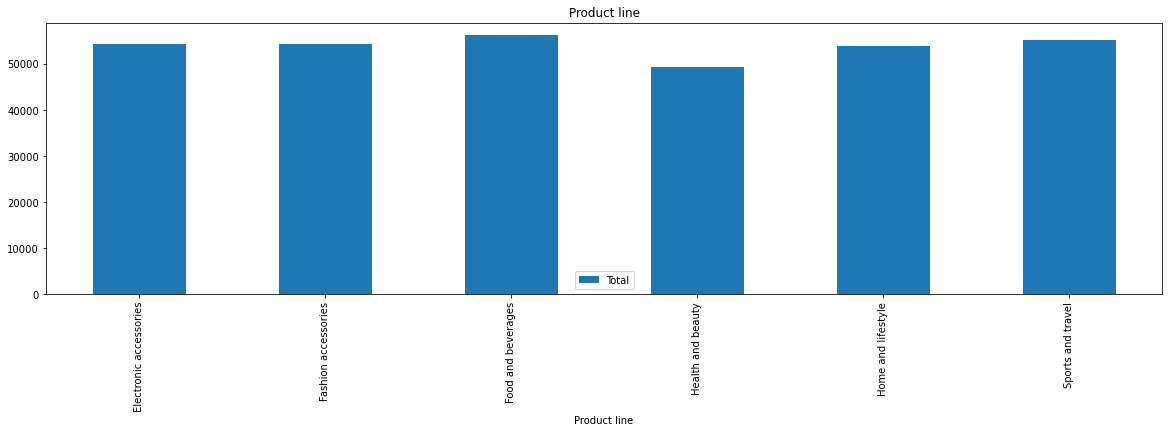

In [689]:

#Bar plots for category sales totals.
cats_to_plot=['Gender','Payment','Customer type','City', 'Product line']
for col in cats_to_plot:
    (groupfunc(col, 'Total','sum')).plot.bar()#Looping through every item in the dataframe.
    plt.title(col)
    plt.show()

<h2> These bar plots above reveal small differences between sales for each catergory. However, to gain actionable insight into sales trends we will dig further into sales over time as well as comparing the variables with each other. 

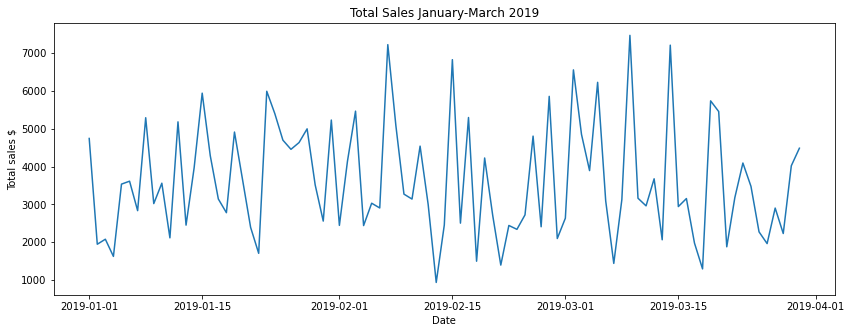

In [690]:
plt.figure(figsize=(14, 5))
total_sales_line = plt.plot(sales_by_date)
plt.title('Total Sales January-March 2019')
plt.xlabel('Date')
plt.ylabel('Total sales $')
plt.show()

<h3>The line plot above does not suggest any clear trend in sales over the three month time period.
   <br>So lets see if grouping sales by product line gives any new results.

Text(0.5, 1.0, 'Total sales grouped by product line')

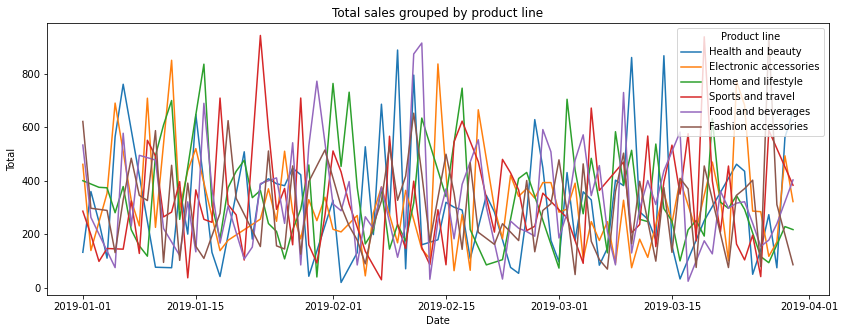

In [691]:
plt.figure(figsize=(14, 5))
sns.lineplot(x="Date", y="Total", hue="Product line", data=clean_ds, ci=None)
plt.title('Total sales grouped by product line')


<h3> The time series is too messy at this level of detail. So we need to aggregate. 
Below we create a new column for the hour.

In [692]:
#Extracts the hour element of the datetime column into a new column
#sorts sales totals by hour
clean_ds['hour']=clean_ds['Time'].dt.hour
df_sort_hours=clean_ds.sort_values(by=['hour'], ascending=True)
print(df_sort_hours.head())

      Invoice ID       City Customer type  Gender        Product line  \
681  320-85-2052   Mandalay        Normal  Female   Sports and travel   
760  842-40-8179   Mandalay        Member  Female  Food and beverages   
507  862-17-9201   Mandalay        Normal  Female  Food and beverages   
773  471-06-8611  Naypyitaw        Normal  Female  Food and beverages   
787  790-38-4466  Naypyitaw        Normal  Female   Health and beauty   

     Unit price  Quantity     Total       Date                Time  \
681       34.81         1   36.5505 2019-01-14 2021-09-22 10:11:00   
760       77.20        10  810.6000 2019-02-11 2021-09-22 10:38:00   
507       84.05         6  529.5150 2019-01-29 2021-09-22 10:48:00   
773       52.42         1   55.0410 2019-02-06 2021-09-22 10:22:00   
787       10.99         5   57.6975 2019-01-23 2021-09-22 10:18:00   

         Payment    cogs  gross income  Rating  hour  
681  Credit card   34.81        1.7405     7.0    10  
760  Credit card  772.00      

<h3> With the new 'hour' column, we can now get useful results when plotting sales throughout the day for each category.

Text(0.5, 1.0, 'Average sales by hour')

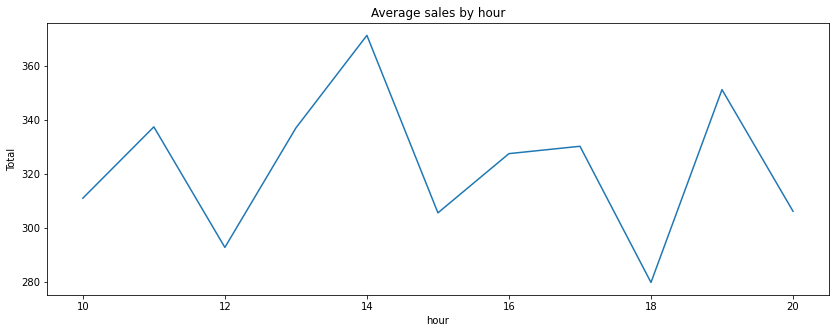

In [693]:
plt.figure(figsize=(14, 5))
sns.lineplot(x="hour", y="Total", data=df_sort_hours, ci=None)
plt.title('Average sales by hour')


In [694]:
#function to plot categories by hourly averages
def hourly_avg_line (param):
    plt.figure(figsize=(14, 5))
    sns.lineplot(x="hour", y="Total", hue=param, data=df_sort_hours, ci=None)
    plt.title('Average hourly sales by ' + str(param))


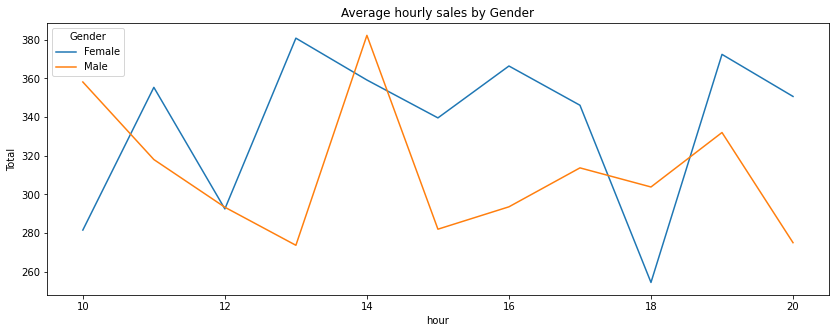

In [669]:
hourly_avg_line('Gender')

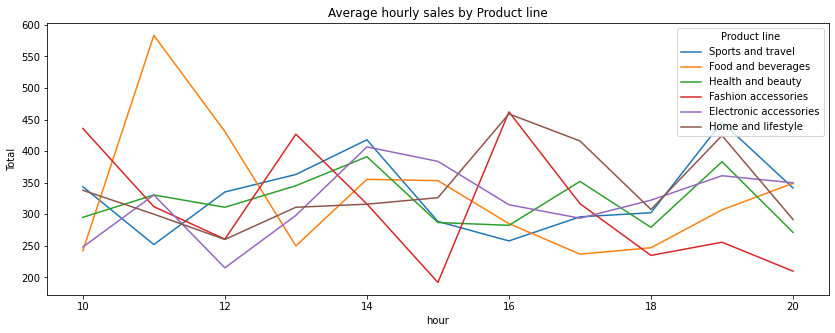

In [695]:
hourly_avg_line('Product line')

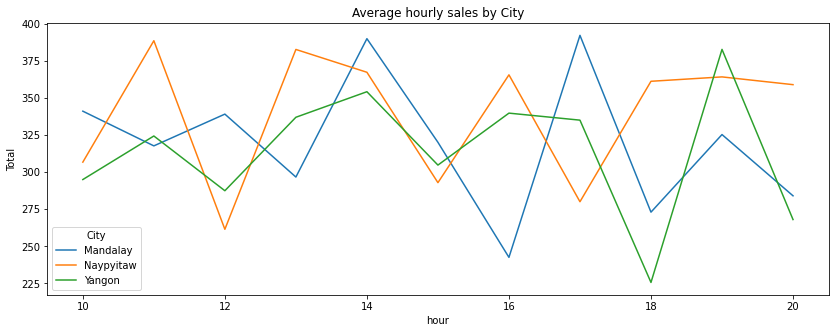

In [696]:
hourly_avg_line('City')

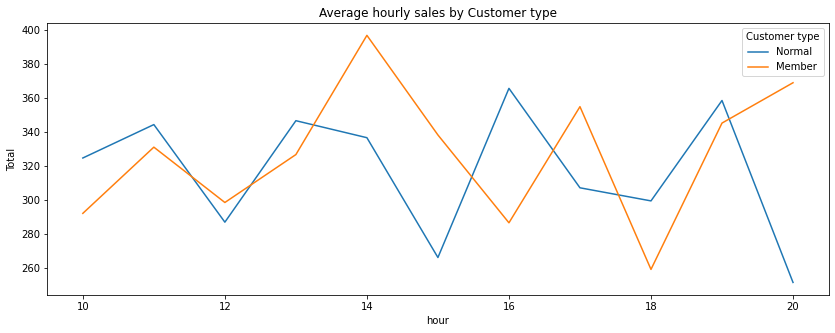

In [633]:
hourly_avg_line('Customer type')

<h4> Below, we group by main categories and a subcategories in order to see correlations between these variables

In [705]:
#function to create bar plots for combinations of categorcial variables
def category_combos (main, sub):
    plt.figure(figsize=(14, 10))
    df=pd.DataFrame(clean_ds.groupby([main, sub])['Total'].agg('mean').sort_values(ascending=False)
)
    df=df.reset_index()
    sns.barplot(x="Total", y=main, hue=sub, data=df, ci=None)
    plt.title('average '+ str(main) + ' sales by ' + str(sub))
    print(df)


              Product line  Gender       Total
0       Home and lifestyle  Female  380.213639
1       Food and beverages  Female  368.565750
2        Health and beauty    Male  348.099460
3        Sports and travel    Male  340.360327
4        Sports and travel  Female  324.712739
5   Electronic accessories  Female  322.643125
6      Fashion accessories  Female  317.056250
7   Electronic accessories    Male  316.691965
8       Home and lifestyle    Male  294.136241
9      Fashion accessories    Male  291.079207
10       Health and beauty  Female  290.015414
11      Food and beverages    Male  273.499125


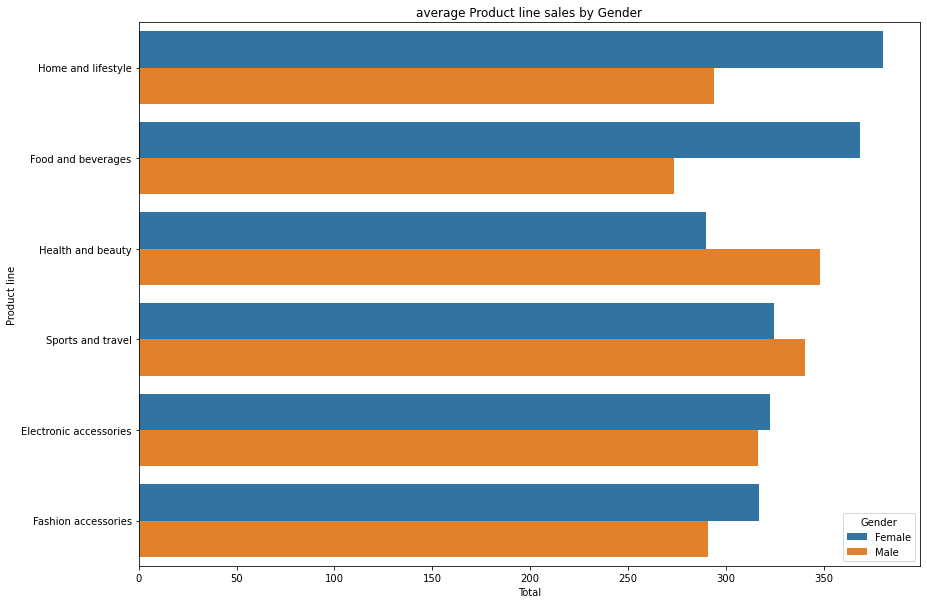

In [706]:
category_combos ('Product line','Gender')

              Product line Customer type       Total
0        Health and beauty        Member  353.849856
1        Sports and travel        Normal  340.361089
2       Home and lifestyle        Member  337.084663
3       Home and lifestyle        Normal  336.154364
4       Food and beverages        Member  333.591702
5        Sports and travel        Member  324.532190
6   Electronic accessories        Normal  324.337353
7   Electronic accessories        Member  314.083269
8       Food and beverages        Normal  309.840300
9      Fashion accessories        Member  306.092581
10     Fashion accessories        Normal  304.151446
11       Health and beauty        Normal  295.730373


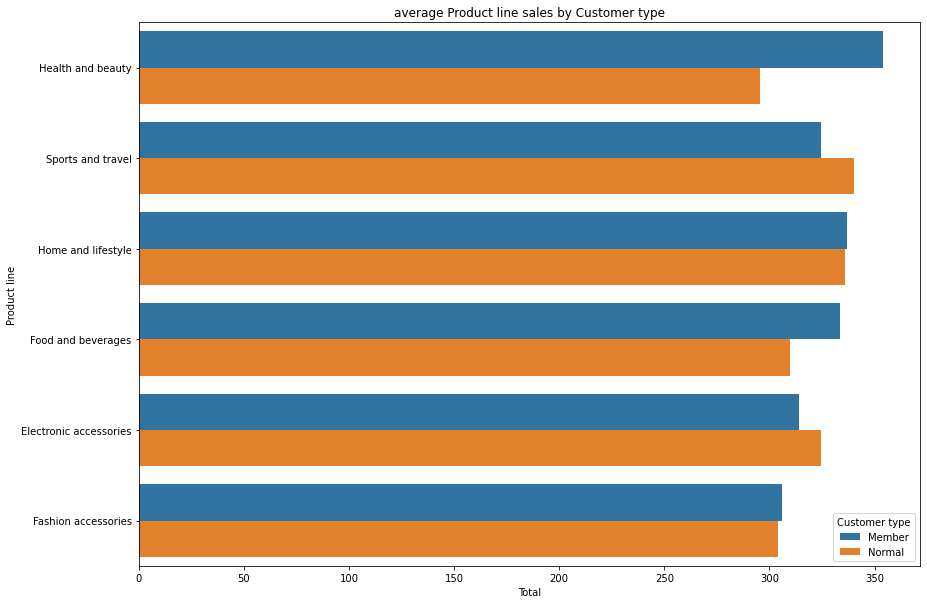

In [717]:
category_combos ('Product line','Customer type')

              Product line       City       Total
0        Health and beauty   Mandalay  376.993585
1       Food and beverages  Naypyitaw  360.103864
2       Home and lifestyle   Mandalay  350.983290
3        Sports and travel  Naypyitaw  350.265067
4   Electronic accessories  Naypyitaw  344.890445
5       Home and lifestyle     Yangon  344.879931
6      Fashion accessories  Naypyitaw  331.693385
7        Sports and travel     Yangon  328.350839
8        Sports and travel   Mandalay  322.390306
9      Fashion accessories     Yangon  320.245265
10       Health and beauty  Naypyitaw  319.525500
11  Electronic accessories   Mandalay  310.026245
12      Home and lifestyle  Naypyitaw  308.790067
13  Electronic accessories     Yangon  305.285225
14      Food and beverages   Mandalay  304.297770
15      Food and beverages     Yangon  295.915526
16       Health and beauty     Yangon  268.037298
17     Fashion accessories   Mandalay  264.730911


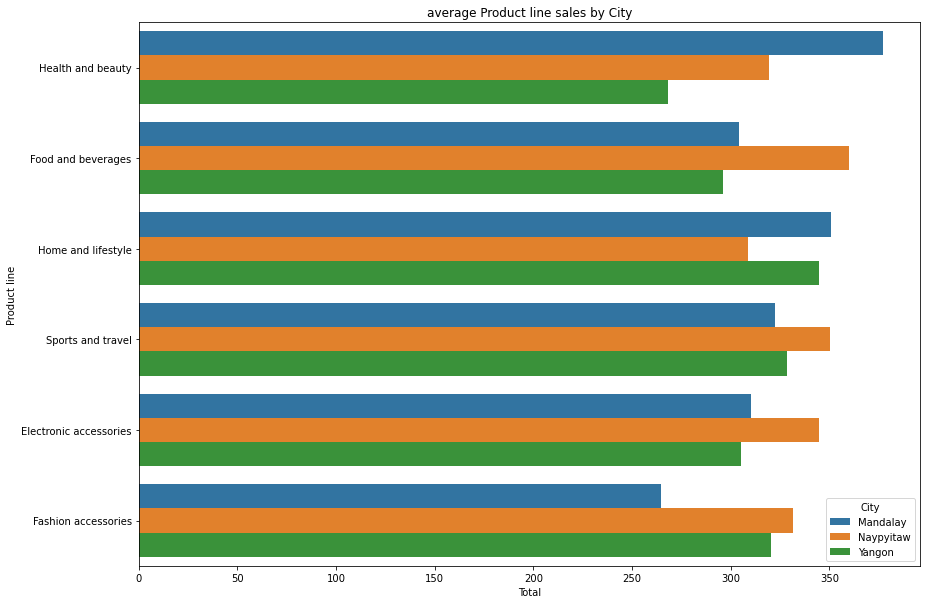

In [718]:
category_combos ('Product line', 'City')

        City  Gender       Total
0  Naypyitaw  Female  346.547545
1     Yangon  Female  330.864391
2   Mandalay  Female  326.717870
3  Naypyitaw    Male  325.888290
4   Mandalay    Male  313.349276
5     Yangon    Male  295.705047


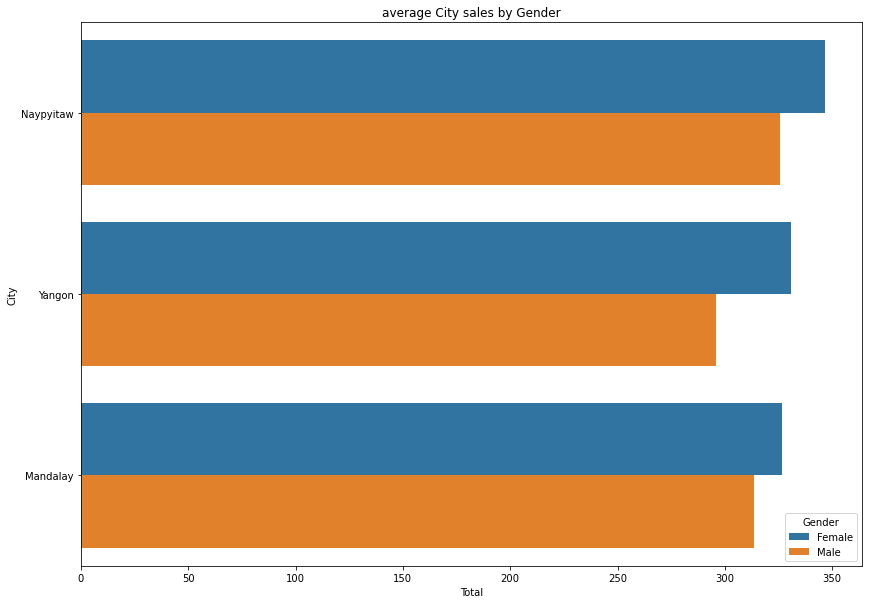

In [719]:
category_combos ('City', 'Gender')

        City Customer type       Total
0   Mandalay        Member  325.482945
1   Mandalay        Normal  314.329257
2  Naypyitaw        Member  336.575636
3  Naypyitaw        Normal  337.656755
4     Yangon        Member  321.182488
5     Yangon        Normal  303.831763


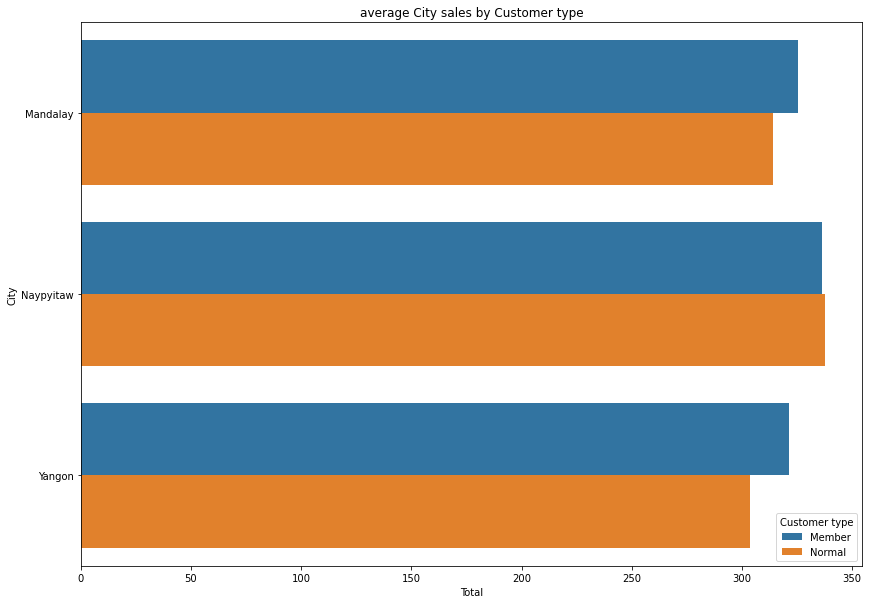

In [639]:
category_combos ('City','Customer type')

<h3> The data set does not include the days of the week. So we will extract that from the date column here. Then we can see sales trends over the week for each variable.

In [708]:
#Creates a new column for day of the week.
clean_ds['day_of_week']=clean_ds['Date'].dt.day_name()
print(clean_ds['day_of_week'])

0      Saturday
1        Friday
2        Sunday
3        Sunday
4        Friday
         ...   
995     Tuesday
996    Saturday
997    Saturday
998      Friday
999      Monday
Name: day_of_week, Length: 1000, dtype: object


             Unit price  Quantity       Total        cogs  gross income  \
day_of_week                                                               
Monday        57.728000  5.104000  303.192624  288.754880     14.437744   
Tuesday       54.837215  5.455696  325.836997  310.320949     15.516047   
Wednesday     53.764685  5.594406  305.812133  291.249650     14.562483   
Thursday      56.959058  5.471014  328.617739  312.969275     15.648464   
Friday        55.097266  5.453237  316.016838  300.968417     15.048421   
Saturday      56.913049  5.603659  342.200058  325.904817     16.295241   
Sunday        54.517970  5.849624  334.269868  318.352256     15.917613   

               Rating       hour  
day_of_week                       
Monday       7.153600  14.912000  
Tuesday      7.003165  14.974684  
Wednesday    6.805594  14.944056  
Thursday     6.889855  14.550725  
Friday       7.076259  14.690647  
Saturday     6.901829  15.201220  
Sunday       7.011278  15.037594  


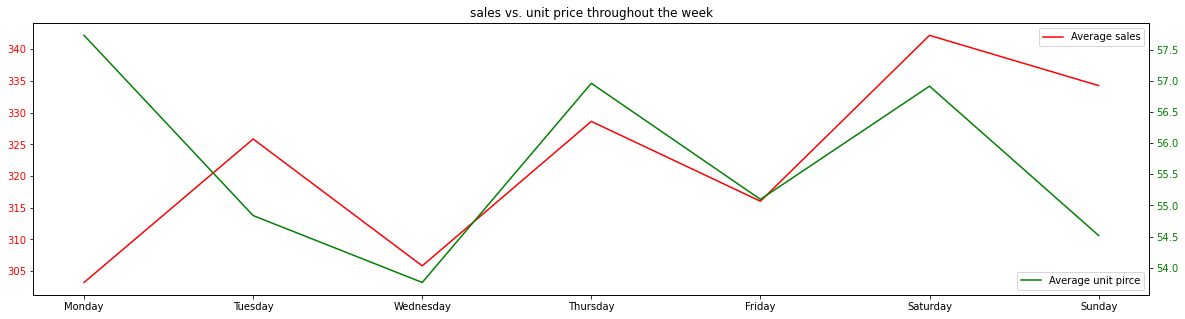

In [709]:
#defines ordered list variable to sort days of week.
#defines a new dataframe grouped by day of the week
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_weekday = pd.DataFrame(clean_ds.groupby(['day_of_week']).mean().reindex(days))
print(df_weekday)
#plt.plot(cats, 'Total', data = df_weekday)
fig, ax = plt.subplots()

#plots sales and unit price on a shared x axis. 
l1=ax.plot(cats, df_weekday['Total'], color='red', label='Average sales')
ax.tick_params(axis='y', labelcolor='red')
ax.legend(loc='upper right')
ax2=ax.twinx()
l2=ax2.plot(cats, df_weekday['Unit price'], color='green', label='Average unit pirce')
ax2.tick_params(axis='y', labelcolor='green')
ax2.legend(loc='lower right')
ax.set_title('sales vs. unit price throughout the week')
plt.show()

<h4>It is clear that customers are buying more expensive items on Mondays, and yet it is our lowest average sales day. On the other hand, on Sundays, customers are buying larger quantities of low priced items, leading to high average total sales. This trend suggests that focusing marketing efforts, store layout, and offerings on increasing volume rather than price would generate higher profits in the long term. 

In [712]:
#function to plot category averages over the week
def weekplot (param):
    df_sales_by_day=pd.DataFrame(clean_ds.groupby(['day_of_week', param])['Total'].agg('mean'))
    df_sales_by_day=df_sales_by_day.reset_index()
    df_sales_by_day['day_of_week']=pd.Categorical(df_sales_by_day['day_of_week'], categories=days, ordered = True)
    df_sales_by_day.sort_values('day_of_week',inplace=True)
    print(df_sales_by_day)
    plt.figure(figsize=(14, 7))
    sns.lineplot(x='day_of_week', y="Total", hue=param, data=df_sales_by_day,ci=None)
    plt.title('Average sales by '+ str(param))
    

   day_of_week            Product line       Total
11      Monday       Sports and travel  275.101313
6       Monday  Electronic accessories  257.483739
7       Monday     Fashion accessories  356.640083
8       Monday      Food and beverages  300.555818
9       Monday       Health and beauty  324.932192
10      Monday      Home and lifestyle  304.767225
30     Tuesday  Electronic accessories  348.652500
31     Tuesday     Fashion accessories  285.510750
32     Tuesday      Food and beverages  378.780635
35     Tuesday       Sports and travel  301.208654
33     Tuesday       Health and beauty  295.158259
34     Tuesday      Home and lifestyle  350.396932
40   Wednesday      Home and lifestyle  340.779711
41   Wednesday       Sports and travel  326.707500
36   Wednesday  Electronic accessories  270.272917
37   Wednesday     Fashion accessories  243.563625
38   Wednesday      Food and beverages  339.045000
39   Wednesday       Health and beauty  309.934026
29    Thursday       Sports and

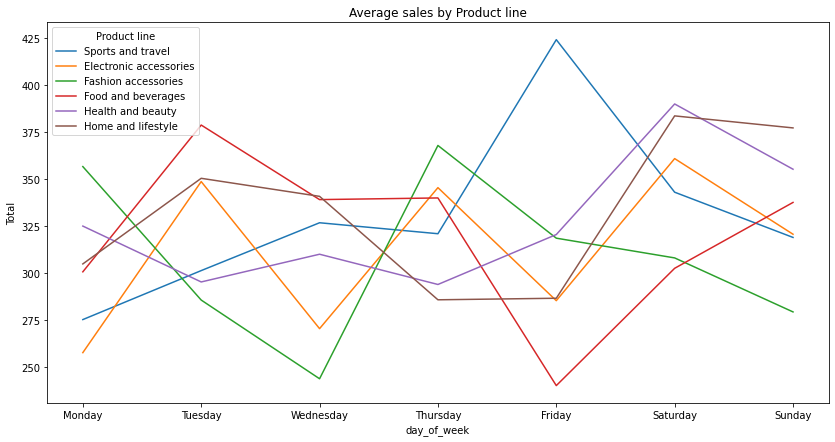

In [713]:
weekplot ('Product line')

   day_of_week  Gender       Total
2       Monday  Female  300.176625
3       Monday    Male  306.790658
10     Tuesday  Female  349.792776
11     Tuesday    Male  296.482732
12   Wednesday  Female  311.509898
13   Wednesday    Male  301.196222
8     Thursday  Female  325.770000
9     Thursday    Male  331.009840
0       Friday  Female  371.504700
1       Friday    Male  267.277500
4     Saturday  Female  337.129052
5     Saturday    Male  347.929636
6       Sunday  Female  344.787560
7       Sunday    Male  323.592818


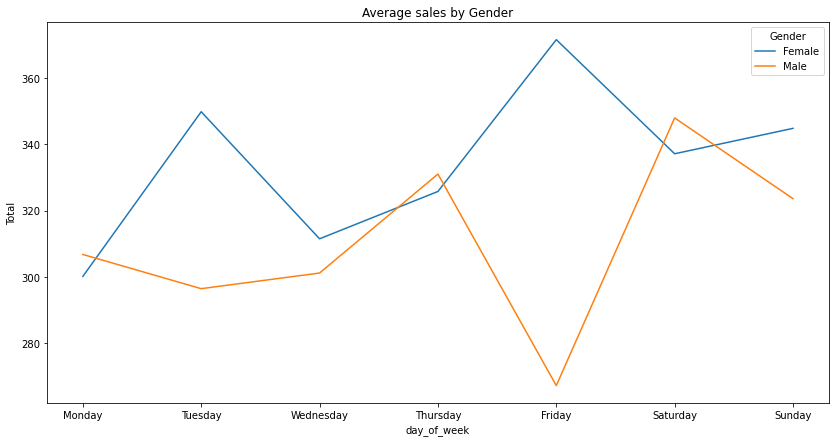

In [714]:
weekplot ('Gender')

   day_of_week       City       Total
3       Monday   Mandalay  326.530885
4       Monday  Naypyitaw  287.508237
5       Monday     Yangon  296.647094
17     Tuesday     Yangon  293.239471
16     Tuesday  Naypyitaw  327.181361
15     Tuesday   Mandalay  355.834698
20   Wednesday     Yangon  308.551779
18   Wednesday   Mandalay  254.151870
19   Wednesday  Naypyitaw  355.116300
14    Thursday     Yangon  335.266826
13    Thursday  Naypyitaw  294.757313
12    Thursday   Mandalay  358.605068
0       Friday   Mandalay  282.701176
2       Friday     Yangon  290.877300
1       Friday  Naypyitaw  393.808303
8     Saturday     Yangon  335.308260
7     Saturday  Naypyitaw  334.647639
6     Saturday   Mandalay  354.740400
9       Sunday   Mandalay  297.580800
11      Sunday     Yangon  327.054202
10      Sunday  Naypyitaw  370.342304


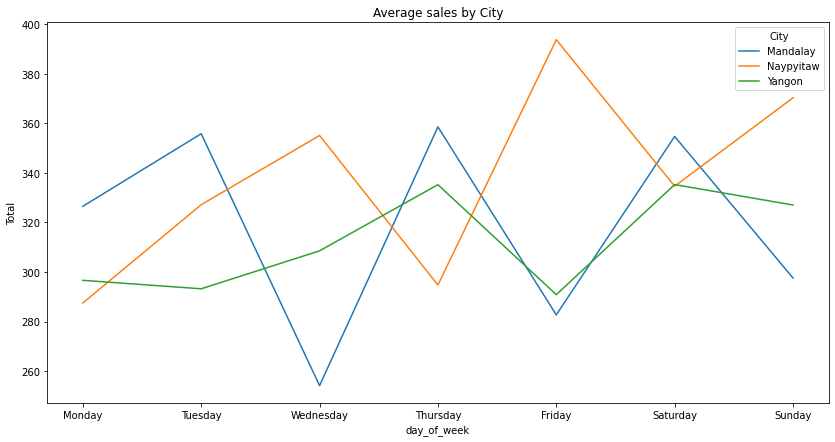

In [715]:
weekplot ('City')

   day_of_week Customer type       Total
2       Monday        Member  311.102898
3       Monday        Normal  296.121318
10     Tuesday        Member  318.771833
11     Tuesday        Normal  335.187949
12   Wednesday        Member  301.906776
13   Wednesday        Normal  310.242090
8     Thursday        Member  287.400586
9     Thursday        Normal  364.265007
0       Friday        Member  346.622555
1       Friday        Normal  289.899960
4     Saturday        Member  342.962909
5     Saturday        Normal  341.437207
6       Sunday        Member  386.872023
7       Sunday        Normal  282.452821


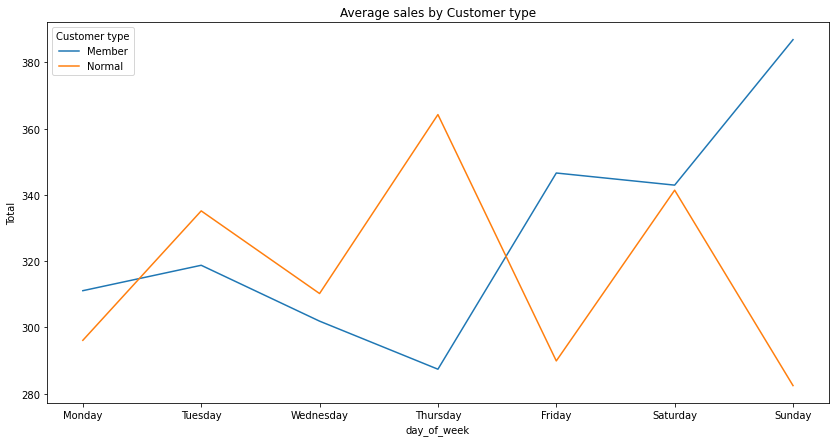

In [716]:
weekplot ('Customer type')